In [1]:
import pandas as pd
#import numpy as np
#import datetime
import matplotlib.pyplot as plt
import altair as alt

levels = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

In [2]:
#import data
taxa = pd.read_csv('py_taxa.csv')
taxa.set_index('OTU', inplace=True)
meta = pd.read_csv('py_meta.csv')
meta['Sample_ID']=meta['Sample_ID'].astype(str)
meta.set_index('Sample_ID', inplace=True)
raw = pd.read_csv('py_raw.csv')
raw.set_index('OTU', inplace=True)
taxa.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
denovo84069,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned
denovo84062,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned
denovo84063,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned
denovo84060,k__Bacteria,p__Proteobacteria,c__Deltaproteobacteria,o__Myxococcales,f__,g__,s__
denovo84061,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Hyphomicrobiaceae,g__Hyphomicrobium,s__


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


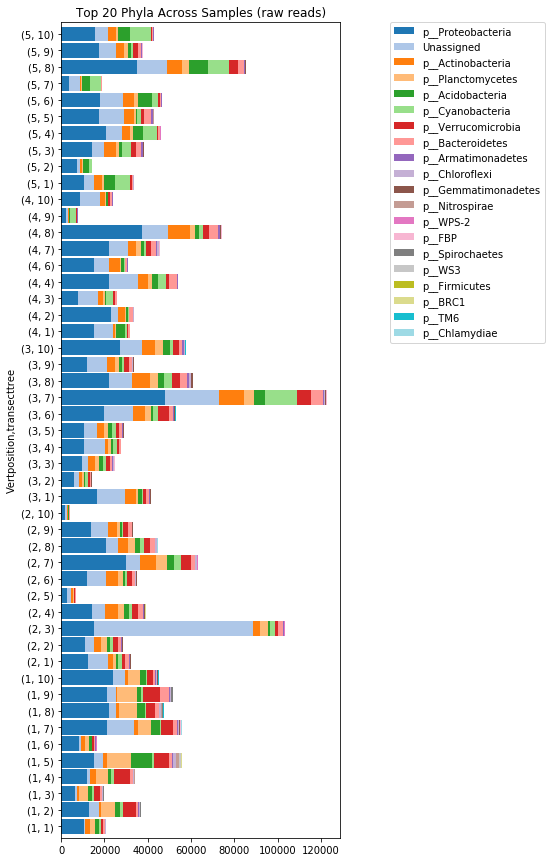

p__Proteobacteria  Unassigned  p__Actinobacteria  \
Vertposition transecttree                                                     
1            1                         10335         872               1943   
             2                         12901        4428               1108   
             3                          6334         907               1091   
             4                         12083        1430               2415   
             5                         14988        4297               1774   
             6                          8297         798               1781   
             7                         21023       12790               1735   
             8                         21999        3394               1249   
             9                         21086        4035                484   
             10                        23978        5318               1674   
2            1                         12354        9288               2254   
             2                         10948        4283               3056   
             3                         15308       73387               3312   
             4                         14214        6038               6223   
             5                          2487        2097                955   
             6                         11942        8907               5499   
             7                         29962        6447               7584   
             8                         20650        5450               4959   
             9                         13868        7619               4234   
             10                         1550        1244                119   
3            1                         16732       12610               5377   
             2                          5915        2226               1529   
             3                          9614        2740               3267   
             4                         10708        9525               1348   
             5                         10547        5952               3344   
             6                         19749       13253               5966   
             7                         48041       24765              11896   
             8                         22058       10689               8447   
             9                         12141        9060               3735   
             10                        27097       10220               6005   
4            1                         15252        8613                813   
             2                         22805        3280               3190   
             3                          7990        9223               2272   
             4                         22268       13132               4893   
             6                         15036        6883               5220   
             7                         21998        8814               3995   
             8                         37567       11762              10364   
             9                          2060        1087                439   
             10                         8768        9249               2227   
5            1                         10702        4644               3343   
             2                          7076        1509                886   
             3                         14307        5464               5446   
             4                         20653        7432               3776   
             5                         17590       11518               4606   
             6                         17930       10825               4974   
             7                          3575        5326                405   
             8                         34897       14096               7019   
             9                         17697        7546               3896   
             10                        15770        6009               3333  

In [3]:
#Just one taxa level
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

#Plot Top 10 Phyla by barplot
df= pd.concat([raw, taxa], axis=1)
df=df.groupby('Phylum').sum()
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df=df.head(n=20)
df.drop('tot', inplace=True, axis=1)
df=df.T
cols = ['Vertposition','transecttree']
#cols = ['transecttree','Vertposition']

df=pd.concat([df, meta[cols]], axis=1)
df=df.sort_values(cols)
df=df.set_index(cols)
#plot
df.plot(kind='barh', stacked=True, figsize=[5,15], width=0.9, colors=colors)
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.title('Top 20 Phyla Across Samples (raw reads)')
plt.show()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


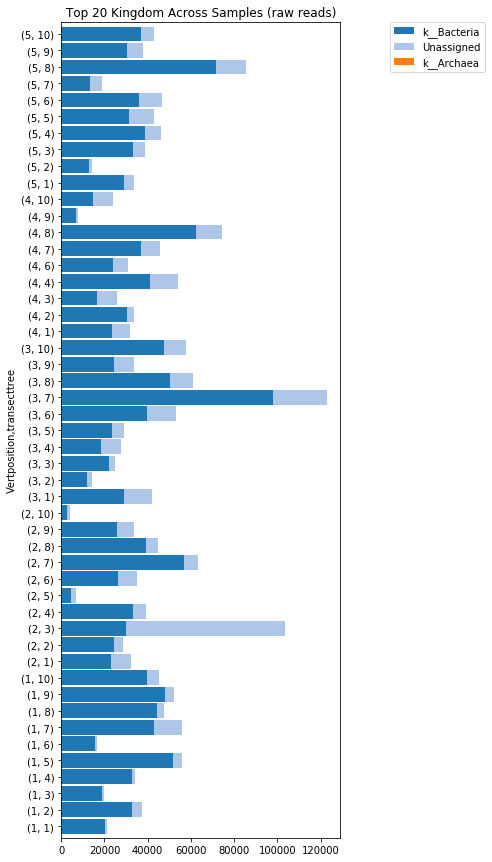

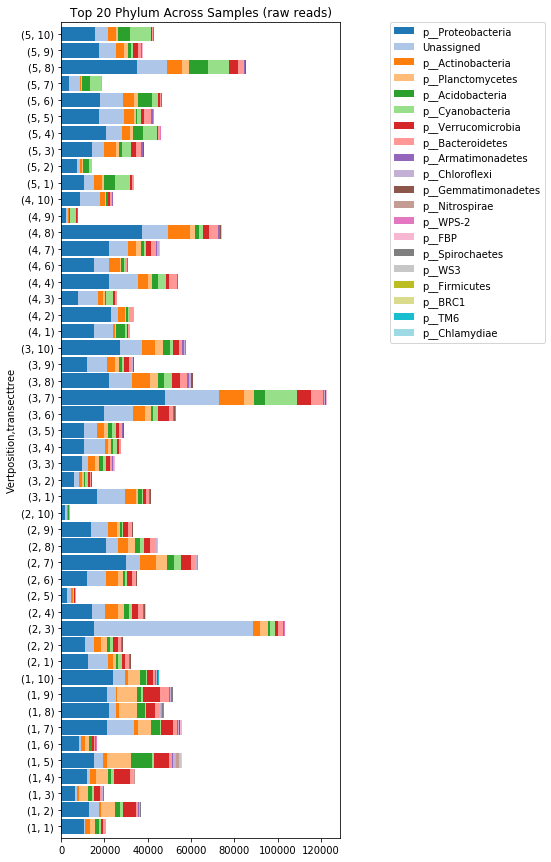

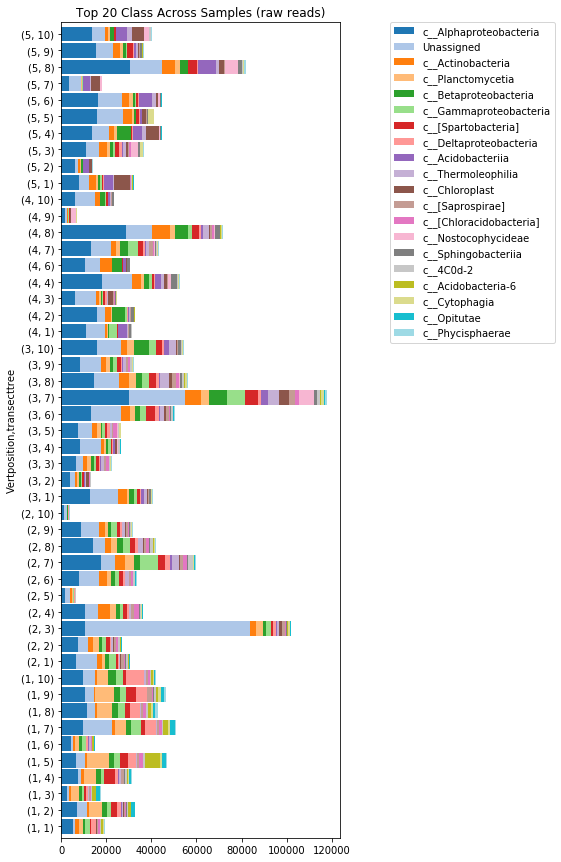

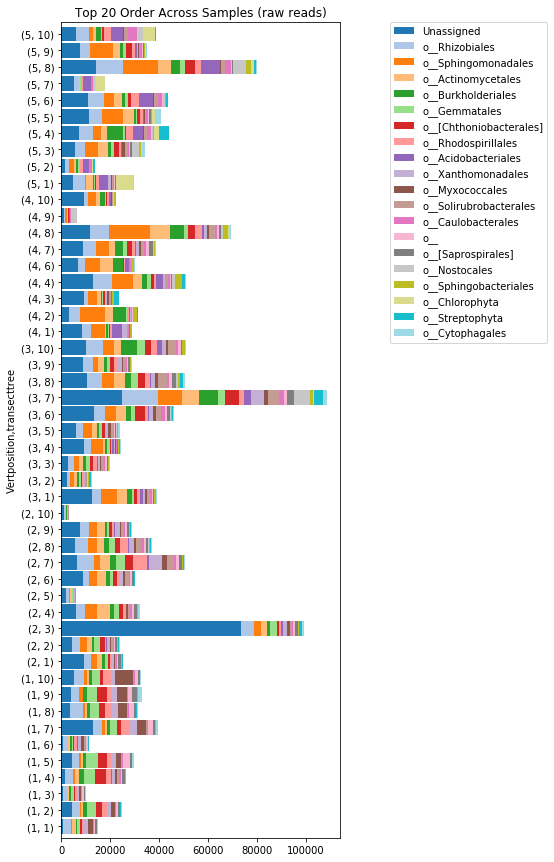

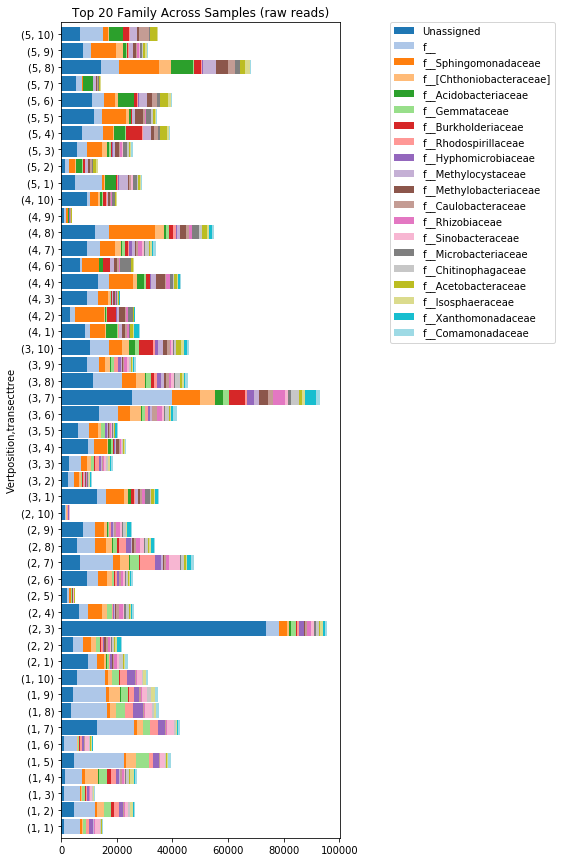

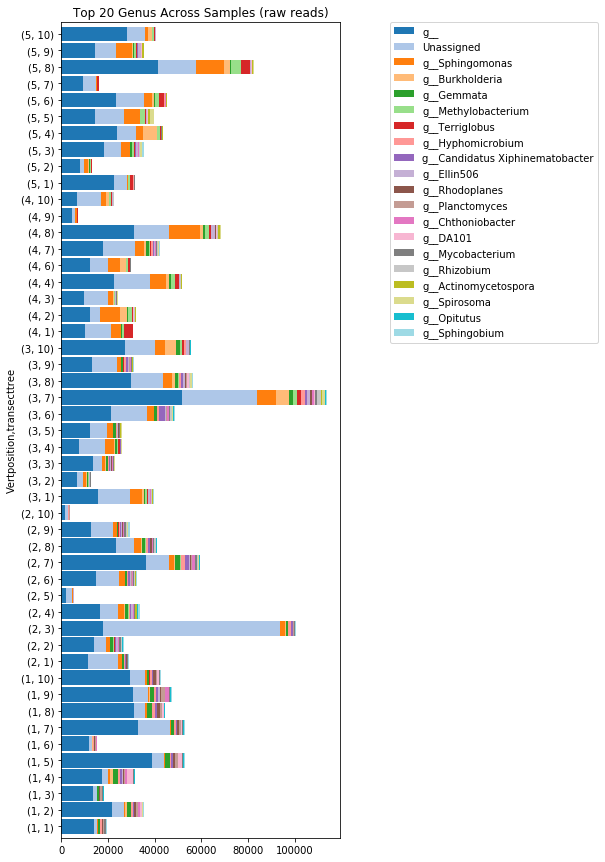

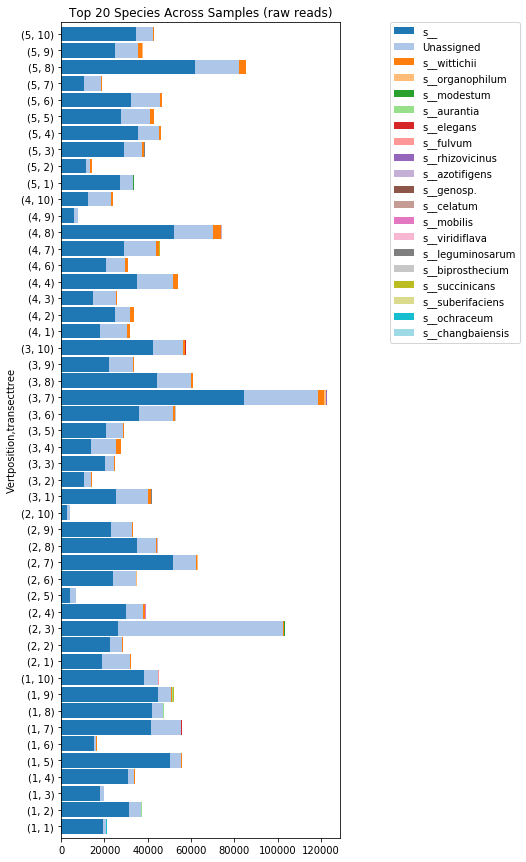

s__  Unassigned  s__wittichii  s__organophilum  \
Vertposition transecttree                                                     
1            1             19188        1638            42                5   
             2             31288        5481            46                1   
             3             18066        1501            35                0   
             4             30675        3001           452                4   
             5             50364        5228            65                2   
             6             15005        1301            61                0   
             7             41696       13742            65                1   
             8             42019        4814            93                0   
             9             44569        6330           193                4   
             10            38108        6631            96                2   
2            1             18652       13109           318               35   
             2             22387        5662           490               21   
             3             26456       76103           591               10   
             4             29757        8186           792               93   
             5              4129        2509           129                5   
             6             24036       10372           370               27   
             7             51791       10605           584               86   
             8             35015        8622           706               86   
             9             23195        9517           455               56   
             10             2480        1406            34                2   
3            1             25312       14891          1340              113   
             2             10650        3091           315                8   
             3             20242        4064           348               36   
             4             13885       11569          2223               44   
             5             20905        7623           602               69   
             6             36024       15772           727               35   
             7             84649       34259          2661              595   
             8             44379       15419          1076               58   
             9             22171       10839           432               34   
             10            42281       13847          1046               71   
4            1             18091       12364          1377               13   
             2             24882        6836          1908               48   
             3             14754       10549           450               53   
             4             35200       16609          2054              181   
             6             20652        8644          1348               31   
             7             29237       14581          1489               34   
             8             52078       18193          3448              285   
             9              5861        1754           123               15   
             10            12472       10680           566               18   
5            1             27325        5758           130               11   
             2             11389        1895           925                1   
             3             28958        8391          1046               48   
             4             35716        9545           640                4   
             5             27634       13592          1483              252   
             6             32430       13053          1012               37   
             7             10684        7856           101                3   
             8             62011       20090          3105              100   
             9             24895       10738          1940               97   
             10            34386        8224           257                6   


In [4]:
#all taxa levels
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

#Plot Top 10 Phyla by barplot
df_tot= pd.concat([raw, taxa], axis=1)

for level in levels:
    df=df_tot.groupby(level).sum()
    df['tot']=df.sum(axis=1)
    df=df.sort_values('tot', ascending=False)
    df=df.head(n=20)
    df.drop('tot', inplace=True, axis=1)
    df=df.T
    cols = ['Vertposition','transecttree']
    #cols = ['transecttree','Vertposition']
    df=pd.concat([df, meta[cols]], axis=1)
    df=df.sort_values(cols)
    df=df.set_index(cols)
    #plot
    df.plot(kind='barh', stacked=True, figsize=[5,15], width=0.9, colors=colors)
    plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
    plt.title('Top 20 '+level+' Across Samples (raw reads)')
    plt.show()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


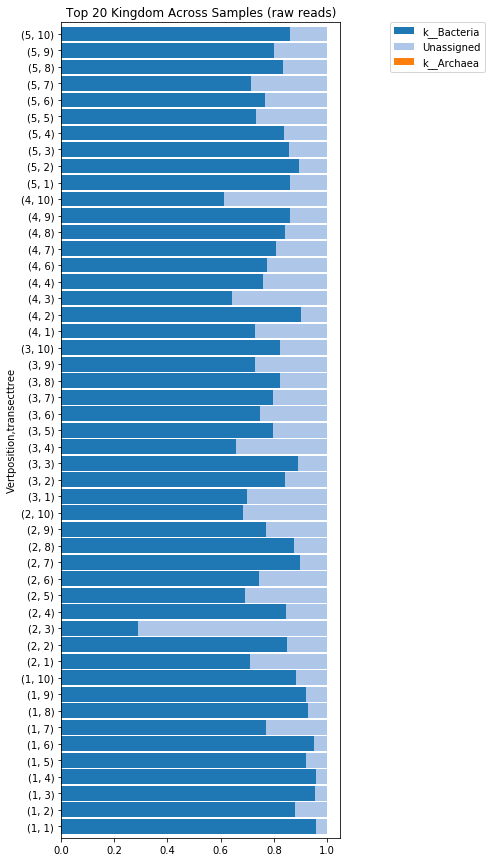

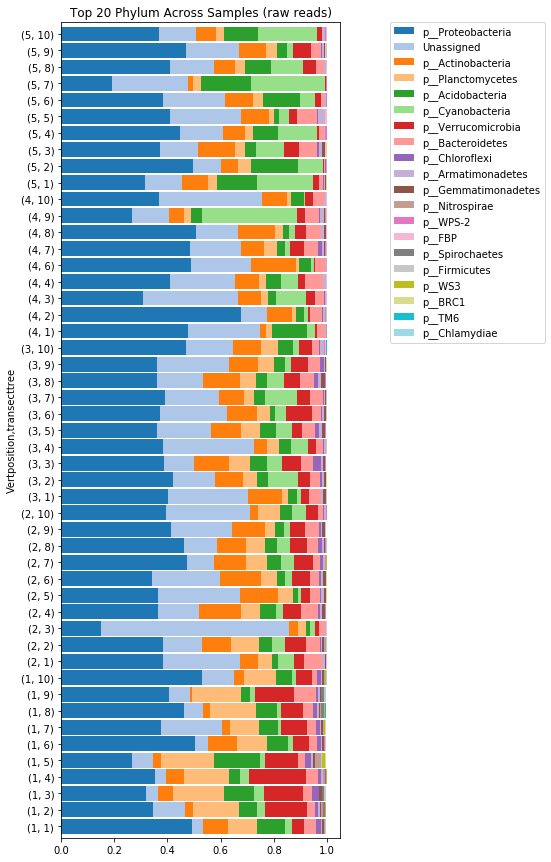

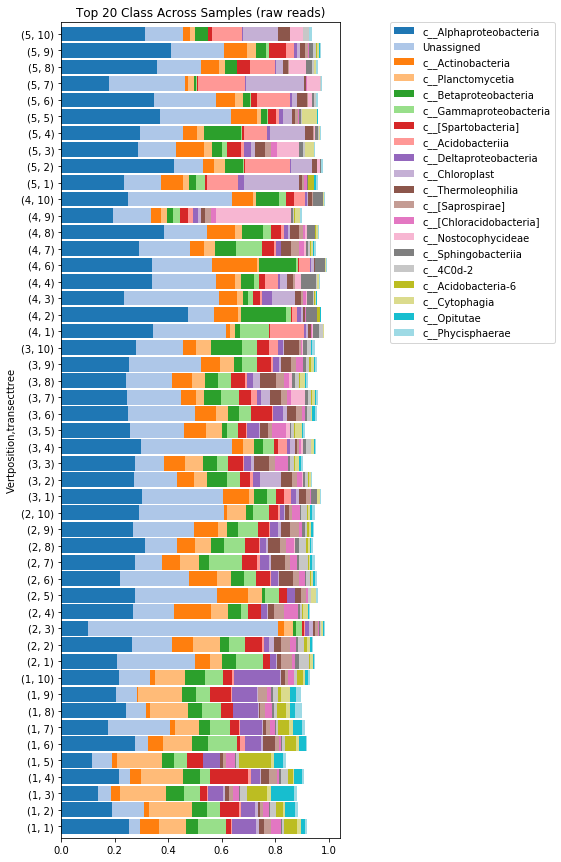

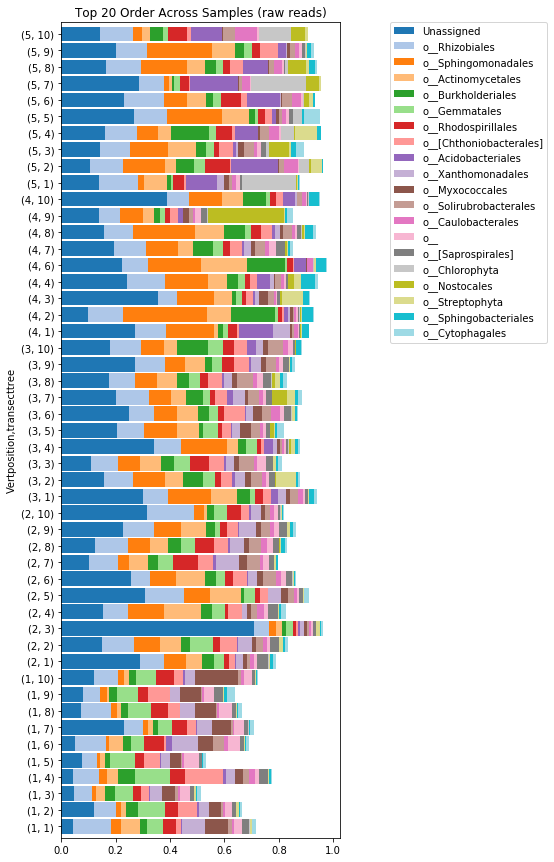

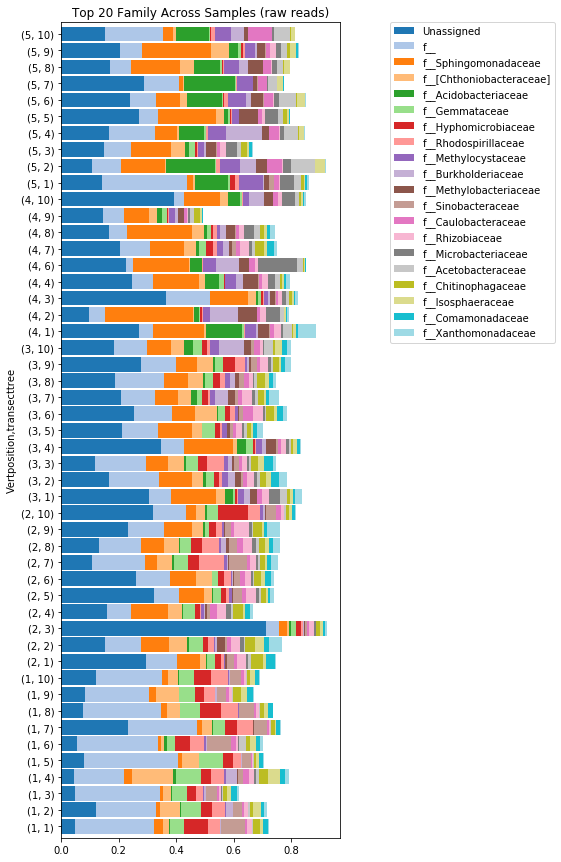

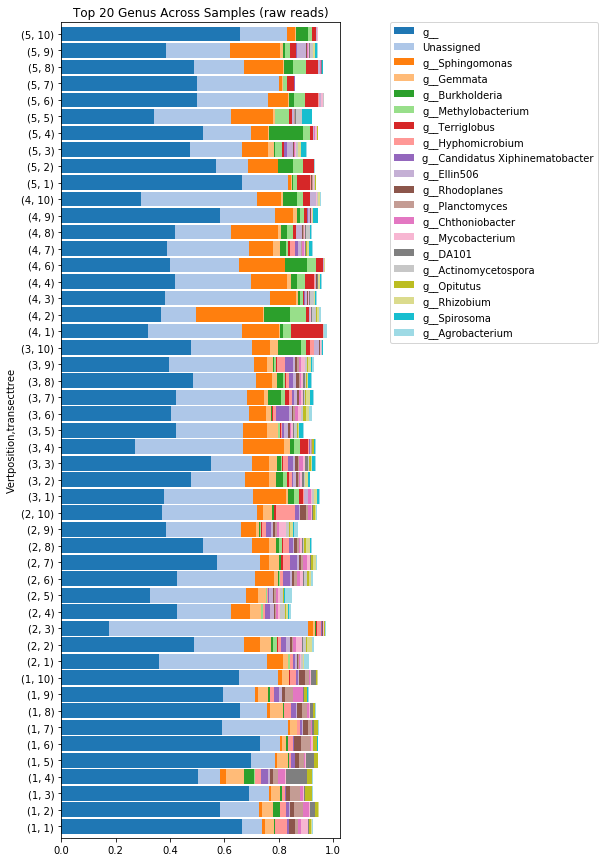

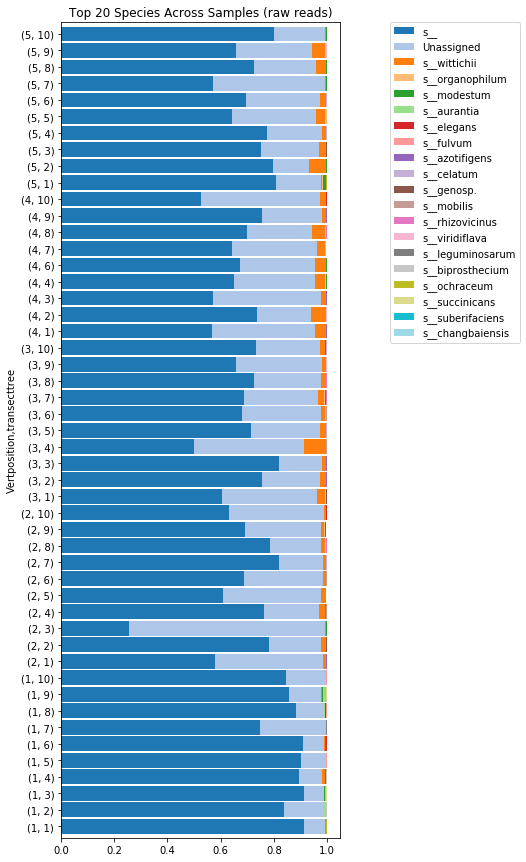

s__  Unassigned  s__wittichii  \
Vertposition transecttree                                       
1            1             0.914847    0.078097      0.002002   
             2             0.840352    0.147212      0.001235   
             3             0.912609    0.075823      0.001768   
             4             0.893429    0.087406      0.013165   
             5             0.901482    0.093578      0.001163   
             6             0.911438    0.079026      0.003705   
             7             0.746544    0.246043      0.001164   
             8             0.883383    0.101207      0.001955   
             9             0.857508    0.121789      0.003713   
             10            0.844929    0.147022      0.002129   
2            1             0.579435    0.407238      0.009879   
             2             0.781478    0.197647      0.017105   
             3             0.255791    0.735807      0.005714   
             4             0.761750    0.209554      0.020274   
             5             0.607742    0.369296      0.018987   
             6             0.687489    0.296665      0.010583   
             7             0.818688    0.167639      0.009232   
             8             0.784914    0.193275      0.015826   
             9             0.692884    0.284293      0.013592   
             10            0.630883    0.357670      0.008649   
3            1             0.605927    0.356466      0.032077   
             2             0.754944    0.219111      0.022329   
             3             0.817826    0.164195      0.014060   
             4             0.499155    0.415897      0.079915   
             5             0.714213    0.260437      0.020567   
             6             0.681163    0.298226      0.013747   
             7             0.688769    0.278757      0.021652   
             8             0.725455    0.252052      0.017589   
             9             0.659518    0.322426      0.012851   
             10            0.734160    0.240437      0.018163   
4            1             0.566353    0.387064      0.043108   
             2             0.737201    0.202536      0.056530   
             3             0.570401    0.407833      0.017397   
             4             0.649387    0.306411      0.037893   
             6             0.672156    0.281334      0.043873   
             7             0.641824    0.320089      0.032687   
             8             0.700887    0.244849      0.046405   
             9             0.754214    0.225711      0.015828   
             10            0.524342    0.449004      0.023796   
5            1             0.809030    0.170481      0.003849   
             2             0.798780    0.132908      0.064876   
             3             0.751395    0.217727      0.027141   
             4             0.775356    0.207212      0.013894   
             5             0.642472    0.316005      0.034479   
             6             0.693957    0.279316      0.021655   
             7             0.571551    0.420264      0.005403   
             8             0.725495    0.235042      0.036327   
             9             0.658598    0.284074      0.051323   
             10            0.799805    0.191287      0.005978   

                           s__organophilum  s__modestum  s__aurantia  \
Vertposition transecttree                                              
1            1                    0.000238     0.000191     0.000238   
             2                    0.000027     0.000537     0.008165   
             3                    0.000000     0.000909     0.005405   
             4                    0.000117     0.001078     0.001427   
             5                    0.000036     0.000018     0.001002   
             6                    0.000000     0.003523     0.000668   
             7                    0.000018     0.000072     0.000859   
             8                    0.000000     0.000168     0.007800

In [5]:
#all taxa levels - Compostional
from palettable.tableau import Tableau_20 as pr
colors=pr.mpl_colors
cmap=pr.mpl_colormap

#Plot Top 10 Phyla by barplot
df_tot= pd.concat([raw, taxa], axis=1)
for level in levels:
    df=df_tot.groupby(level).sum()
    #make_compositional
    df=df.T
    df['tot']=df.sum(axis=1)
    col_names = list(df)
    for i in col_names:
        df[i] = df[i]/df['tot']
    df.drop('tot', inplace=True, axis=1)
    df=df.T
    
    df['tot']=df.sum(axis=1)
    df=df.sort_values('tot', ascending=False)
    df=df.head(n=20)
    df.drop('tot', inplace=True, axis=1)
    df=df.T
    cols = ['Vertposition','transecttree']
    #cols = ['transecttree','Vertposition']
    df=pd.concat([df, meta[cols]], axis=1)
    df=df.sort_values(cols)
    df=df.set_index(cols)
    #plot
    df.plot(kind='barh', stacked=True, figsize=[5,15], width=0.9, colors=colors)
    plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
    plt.title('Top 20 '+level+' Across Samples (raw reads)')
    plt.show()
df

# Altair interactive visualization of Taxa across Samples

In [6]:
import altair as alt
#from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Format Data and Choose Subsection to visualize

In [7]:
print(taxa['Phylum'].unique())

['Unassigned' 'p__Proteobacteria' 'p__Planctomycetes' 'p__Acidobacteria'
 'p__Verrucomicrobia' 'p__Chloroflexi' 'p__Actinobacteria'
 'p__Bacteroidetes' 'p__Gemmatimonadetes' 'p__Nitrospirae'
 'p__Armatimonadetes' 'p__Firmicutes' 'p__Cyanobacteria' 'p__WS3'
 'p__Chlamydiae' 'p__Elusimicrobia' 'p__OP11' 'p__Fibrobacteres' 'p__TM7'
 'p__Chlorobi' 'p__BRC1' 'p__[Parvarchaeota]' 'p__GN02' 'p__Tenericutes'
 'p__Crenarchaeota' 'p__Spirochaetes' 'p__FBP' 'p__[Thermi]' 'p__OP3'
 'p__WPS-2' 'p__FCPU426' 'p__TM6' 'p__OD1' 'p__BHI80-139' 'p__WS2'
 'p__NKB19' 'p__WS4' 'p__' 'p__GAL15' 'p__AD3' 'p__Fusobacteria' 'p__GN04'
 'p__MVP-21' 'p__[Caldithrix]' 'p__SR1' 'p__ZB3' 'p__NC10']


In [8]:
#select a subsection of data
uptaxa_level = 'Phylum'
uptaxa_name ='p__Proteobacteria'
#view at level:
low_taxa_level = 'Order'


In [9]:
df= pd.concat([raw, taxa], axis=1)
df=df.loc[df[uptaxa_level]==uptaxa_name]
df=df.groupby([low_taxa_level]).sum()
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df=df.head(n=10) #can just look at top 10
df.drop('tot', inplace=True, axis=1)
df=df.T

cols = ['Vertposition', 'transecttree']

df=pd.concat([df, meta[cols]], axis=1)
df=df.sort_values(cols)
df=df.groupby(cols).sum()
#df=df.set_index(cols)
phyla = list(df)
df=df.reset_index()

#need to make long form data
df=df.melt(id_vars=['Vertposition', 'transecttree'], value_vars=phyla)

df.head()

,Vertposition,transecttree,variable,value
0,1,1,o__Rhizobiales,2964
1,1,2,o__Rhizobiales,3047
2,1,3,o__Rhizobiales,1307
3,1,4,o__Rhizobiales,3315
4,1,5,o__Rhizobiales,2914


## Input into Altair plot

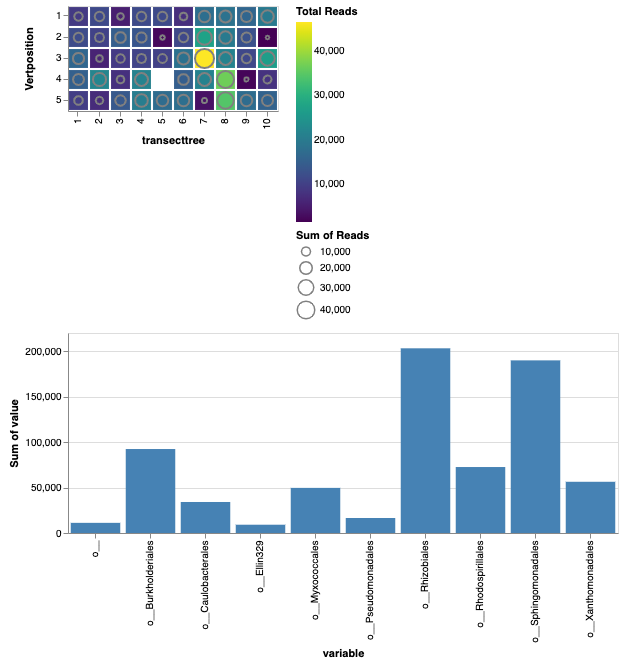

In [10]:
pts = alt.selection(type="single", encodings=['x'])
#rectangle plot of overall read number
rect = alt.Chart(df).mark_rect().encode(
    alt.Y('Vertposition:N'),
    alt.X('transecttree:N'),
    alt.Color('sum(value)',
        #scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Reads')
    )
)
#circle plot of total read number in selection
circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('sum(value)',
        legend=alt.Legend(title='Sum of Reads')
    )
).transform_filter(
    pts
)
#bar plot of total reads per taxon level
bar = alt.Chart(df).mark_bar().encode(
    x='variable',
    y='sum(value)',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)
#Put it all together, legend location
alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)